In [1]:
%cd /scratch_net/biwidl214/ecetin_scratch/GSCodec

/scratch_net/biwidl214/ecetin_scratch/GSCodec


/scratch_net/biwidl214/ecetin/conda_envs/gscodec/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np
import json

In [3]:
def calculate_psnr(true_image, test_image):
    """
    Calculate the PSNR between two images.
    
    Args:
    true_image (numpy.ndarray): The ground truth image.
    test_image (numpy.ndarray): The reconstructed or noisy image.

    Returns:
    float: The PSNR value in decibels (dB).
    """
    # Ensure the input images have the same dimensions
    if true_image.shape != test_image.shape:
        raise ValueError("True image and test image must have the same dimensions")
    
    # Compute the MSE (Mean Squared Error)
    mse = np.mean((true_image - test_image) ** 2)
    
    # If MSE is zero, the images are identical, and PSNR is infinite
    if mse == 0:
        return float('inf')
    
    # Assuming the pixel values range from 0 to 255
    max_pixel = 255.0
    
    # Calculate PSNR
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

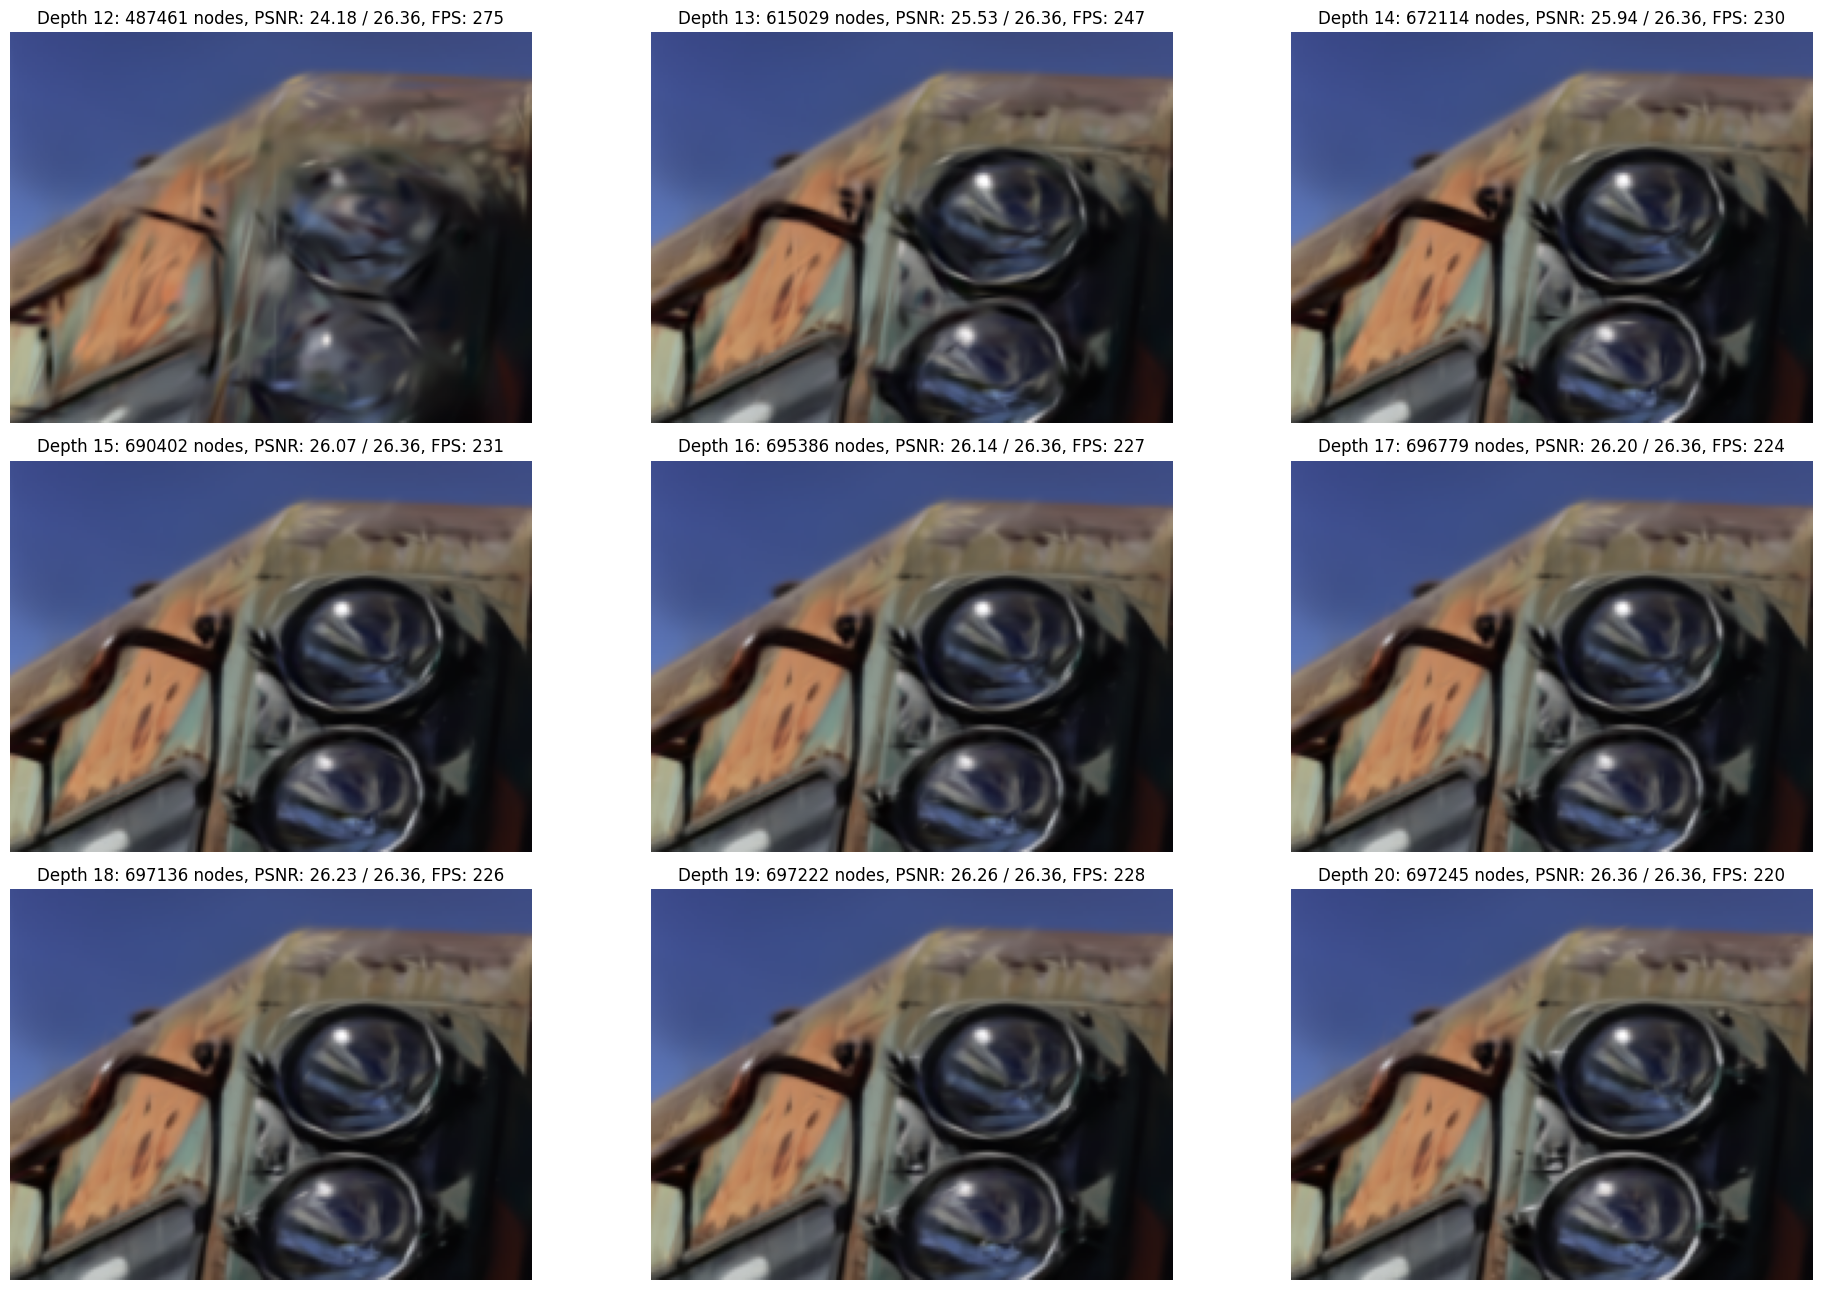

In [4]:
# Base directory where the train_depth folders are located
base_dir = './output/hierarchical_deneme/'
scene = "train"

img_id = "12".zfill(5)  # Image ID to visualize

# Read PSNR value from JSON file of base model
with open(f'./output/hierarchical_full/{scene}/test/testing/per_view.json') as f:
    data = json.load(f)
    base_psnr = data['PSNR'][f'{img_id}.png']


psnrs = []

# Initialize plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 13))  # Adjust nrows and ncols based on the number of images you expect
axes = axes.flatten()  # Flatten the axis array for easy iteration

# Iterate over a certain range, assuming the folders go from train_depth1 to train_depth14
start_depth = 12
end_depth = 20
for depth in range(start_depth, end_depth+1):
    folder_name = f"test_depth{depth}"
    full_path = os.path.join(base_dir, scene, folder_name, f"testing/rendering/{img_id}.png")
    gt_path = os.path.join(base_dir, scene, folder_name, f"testing/gt/{img_id}.png")

    result_file = os.path.join(base_dir, scene, folder_name, "testing/results.log")

    # Check if the result file exists
    if os.path.exists(result_file):
        # Load the result file
        with open(result_file, 'r') as f:
            lines = f.readlines()

            for line in lines:
                if "Rendering used" in line:
                    num_nodes = line.split()[7]

                if "FPS" in line:
                    fps = float(line.split()[7])
                
        # Print the result
        # print(f"Depth {depth}: {num_nodes} nodes")
    else:
        print(f"Result file not found: {result_file}")
    
    # Check if the image file exists
    if os.path.exists(full_path):
        # Load the image
        render_image = imageio.imread(full_path)
        gt_image = imageio.imread(gt_path)

        psnr = calculate_psnr(gt_image.astype(np.float64), render_image.astype(np.float64))

        psnrs.append(psnr)
        
        # Plot the image
        ax = axes[depth-start_depth]  # Get the corresponding subplot axis
        ax.imshow(render_image[50:200, 0:200])
        ax.axis('off')  # Turn off axis
        ax.set_title(f"Depth {depth}: {num_nodes} nodes, PSNR: {psnr:.2f} / {base_psnr:.2f}, FPS: {fps:.0f}")
    else:
        print(f"Image not found: {full_path}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [6]:
psnrs, base_psnr

([23.845347769222908,
  24.98388930965415,
  25.538065560653934,
  25.843751105467092,
  26.048170194789456,
  26.255407060550805,
  26.48787812942161,
  26.832702143823653,
  27.25817363517896],
 27.258174896240234)